In [1]:
import streamlit as st
import pandas as pd
import numpy as np

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import model_from_json
from keras.optimizers import Adam
import os

#viz
import seaborn as sns
import matplotlib.pyplot as plt
#plot model
from sklearn.metrics import confusion_matrix
import itertools

2021-12-01 16:22:56.554 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


In [2]:
#Load the data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
#Load the DL model
from tensorflow.keras.models import save_model, load_model
loaded_model = load_model('model.h5')

In [4]:
#drop the label
y = train["label"]
X = train.drop(labels = ["label"],axis = 1)

In [5]:
# Normalize the data
X_train = X / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [6]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [7]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y, num_classes = 10)

In [8]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (29400, 28, 28, 1)
x_test shape (12600, 28, 28, 1)
y_train shape (29400, 10)
y_test shape (12600, 10)


In [9]:
y_pred = loaded_model.predict(X_val)

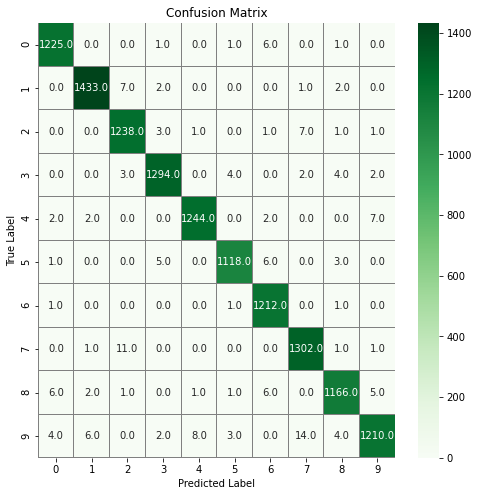

In [10]:
# confusion matrix

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [11]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [12]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1234
           1       0.99      0.99      0.99      1445
           2       0.98      0.99      0.99      1252
           3       0.99      0.99      0.99      1309
           4       0.99      0.99      0.99      1257
           5       0.99      0.99      0.99      1133
           6       0.98      1.00      0.99      1215
           7       0.98      0.99      0.99      1316
           8       0.99      0.98      0.98      1188
           9       0.99      0.97      0.98      1251

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600

